# Task
Perform exploratory data analysis, descriptive analysis, and prescriptive analysis with data visualization, and predict sales using the dataset from "/content/train.csv".

## Load the data

### Subtask:
Load the data from "/content/train.csv" into a dataframe.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Exploratory data analysis (eda)

### Subtask:
Get information about the data types and missing values.


**Reasoning**:
Display the data types and non-null counts of the DataFrame and then calculate and display the count of missing values for each column.



In [2]:
df.info()
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## Exploratory data analysis (eda)

### Subtask:
Get descriptive statistics of the numerical columns.


**Reasoning**:
Calculate and display descriptive statistics for all numerical columns and transpose the result for better readability.



In [3]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


## Exploratory data analysis (eda)

### Subtask:
Explore the distribution of key variables using visualizations (histograms, box plots).


**Reasoning**:
Create a histogram and a box plot for the 'Sales' column to visualize its distribution and identify outliers.



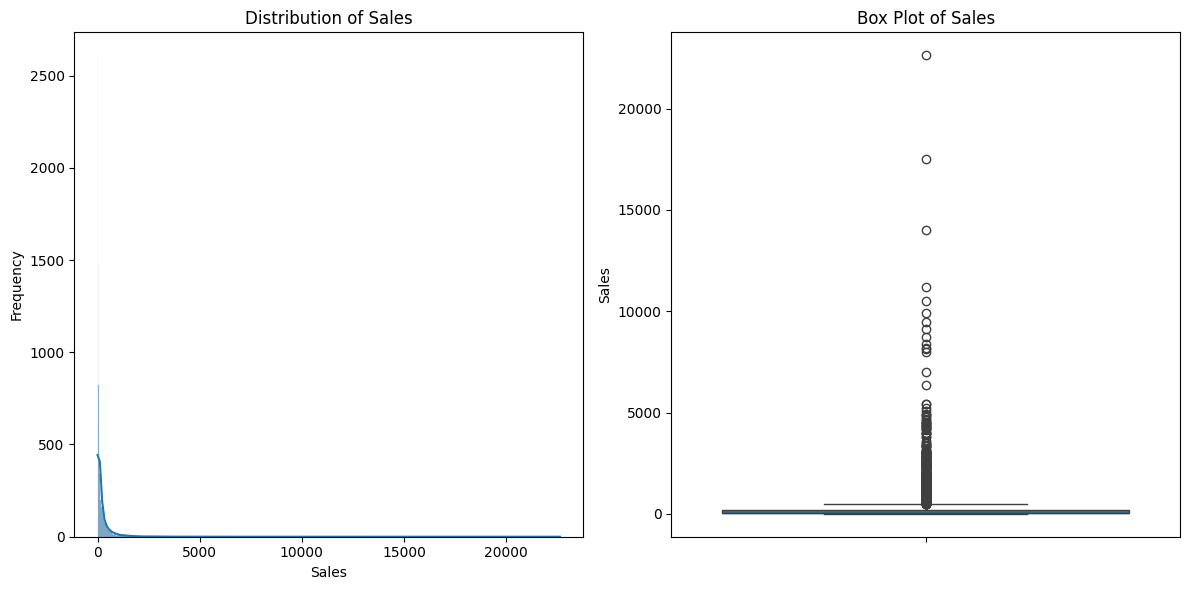

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Sales'])
plt.title('Box Plot of Sales')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

## Exploratory data analysis (eda)

### Subtask:
Analyze relationships between variables using visualizations (scatter plots, correlation matrix).


**Reasoning**:
Create scatter plots for 'Sales' and 'Postal Code', calculate and visualize the correlation matrix for numerical columns.



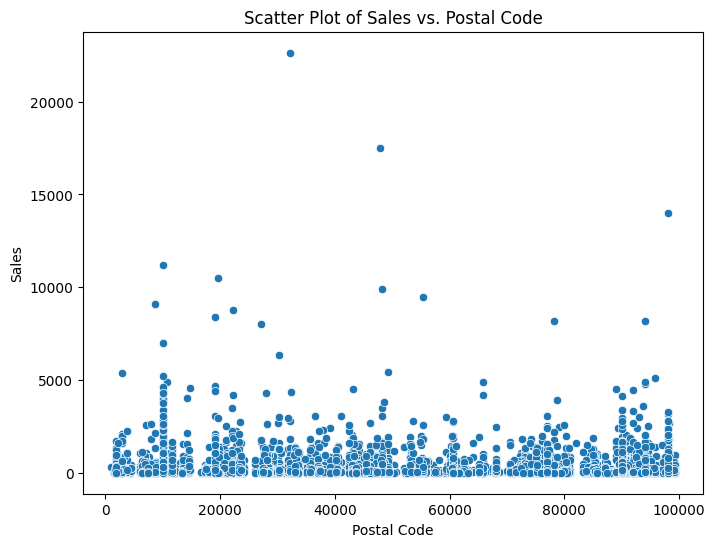

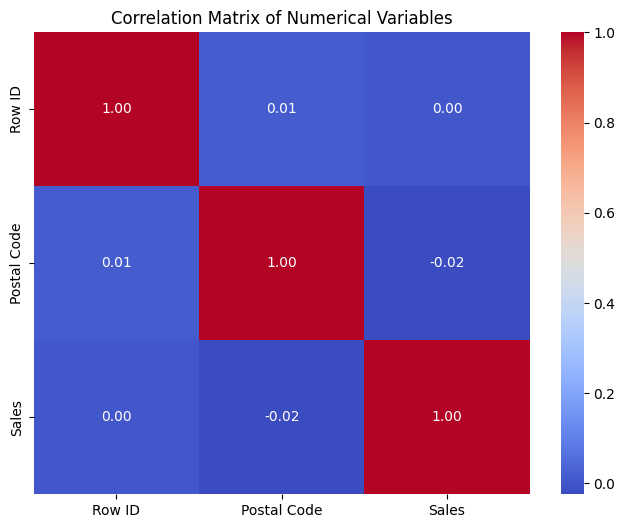

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Postal Code', y='Sales', data=df)
plt.title('Scatter Plot of Sales vs. Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Sales')
plt.show()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Descriptive analysis

### Subtask:
Summarize the key characteristics of the data, such as sales trends over time, performance across different stores or product categories.


**Reasoning**:
The subtask requires converting the 'Order Date' column to datetime objects, extracting year and month, grouping by year, category, and sub-category, calculating total sales for each group, and displaying the results. I will perform these steps in a single code block.



In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

sales_by_year = df.groupby('Order Year')['Sales'].sum()
sales_by_category = df.groupby('Category')['Sales'].sum()
sales_by_sub_category = df.groupby('Sub-Category')['Sales'].sum()

print("Total Sales by Year:")
display(sales_by_year)

print("\nTotal Sales by Category:")
display(sales_by_category)

print("\nTotal Sales by Sub-Category:")
display(sales_by_sub_category)

Total Sales by Year:


,Sales
Order Year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192



Total Sales by Category:


,Sales
Category,
Furniture,728658.5757
Office Supplies,705422.3340
Technology,827455.8730



Total Sales by Sub-Category:


,Sales
Sub-Category,
Accessories,164186.7000
Appliances,104618.4030
Art,26705.4100
Binders,200028.7850
Bookcases,113813.1987
Chairs,322822.7310
Copiers,146248.0940
Envelopes,16128.0460
Fasteners,3001.9600


## Data visualization

### Subtask:
Create relevant visualizations to support the EDA and descriptive analysis.


**Reasoning**:
Create the requested visualizations to support the EDA and descriptive analysis using the previously calculated sales data.



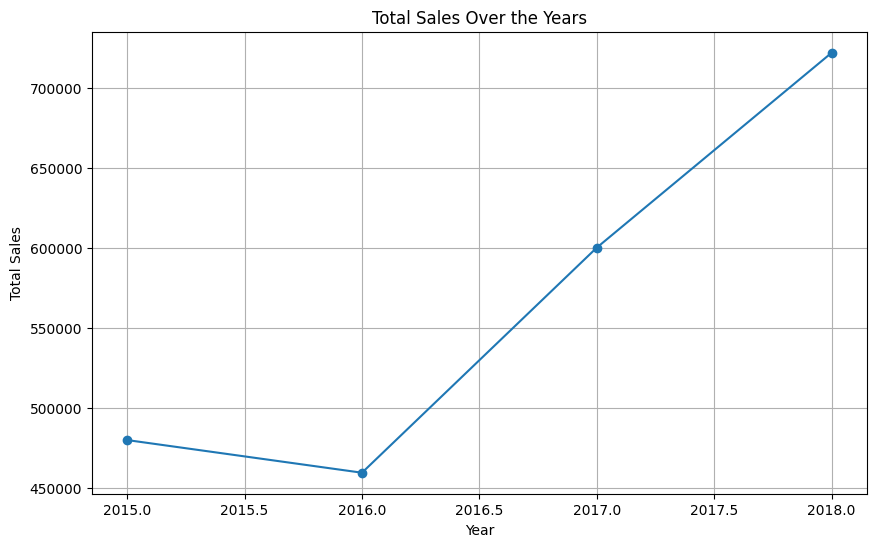

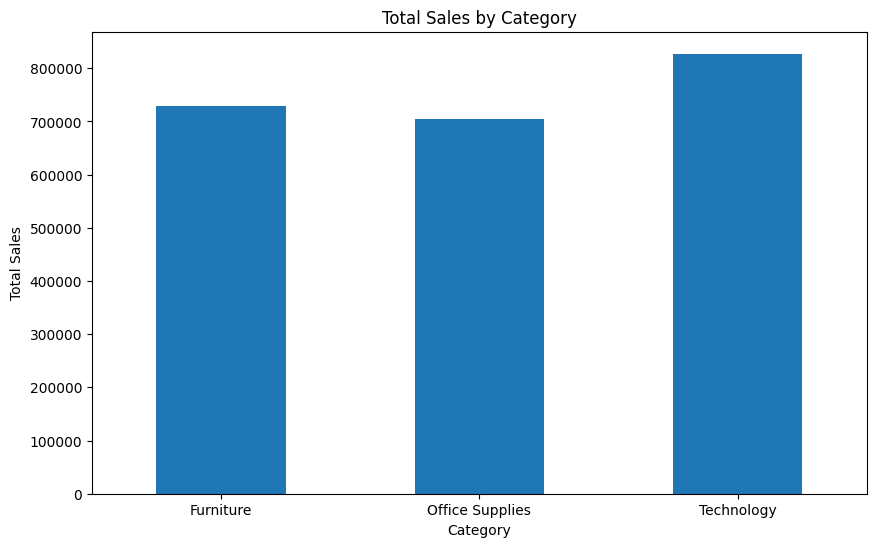

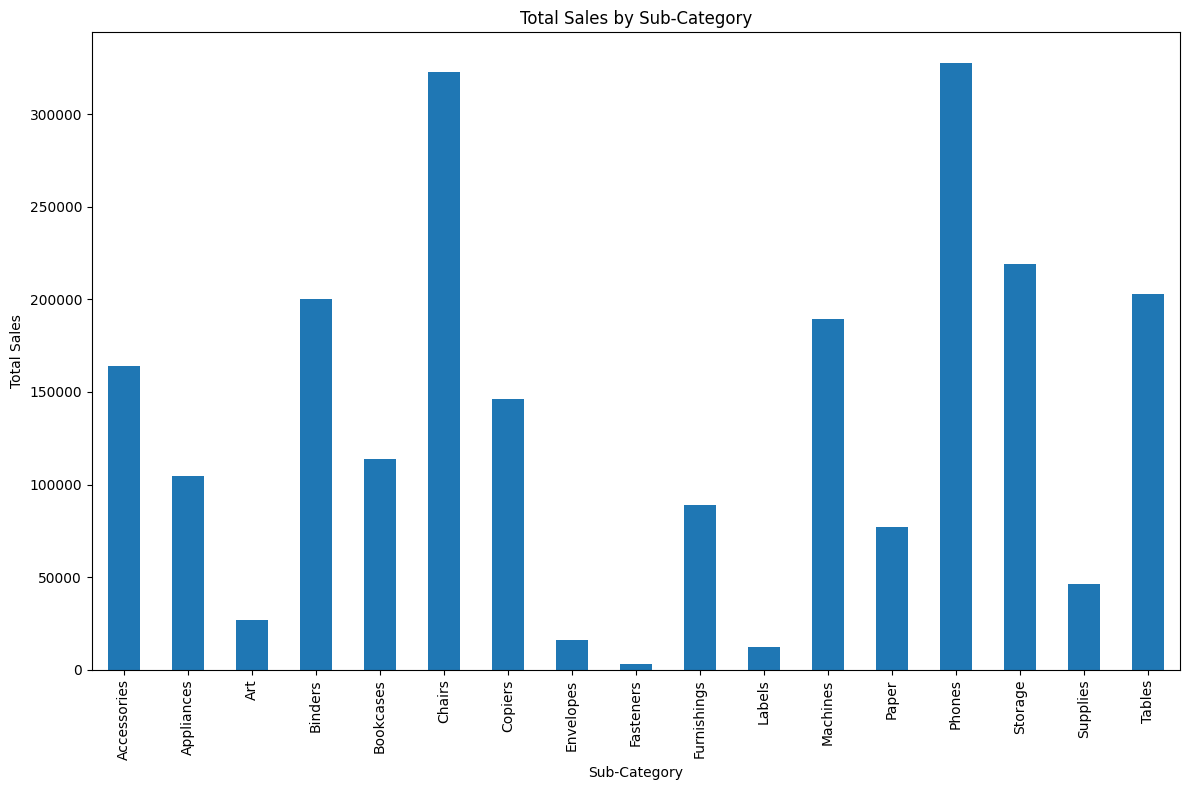

In [7]:
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o')
plt.title('Total Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 8))
sales_by_sub_category.plot(kind='bar')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Prescriptive analysis

### Subtask:
Based on the insights from EDA and descriptive analysis, suggest actionable recommendations to improve sales.


## Sales prediction

### Subtask:
Preprocess the data for modeling (handle missing values, encode categorical features, split data into training and testing sets).


**Reasoning**:
Handle missing values in the 'Postal Code' column by filling them with the mode, select relevant features, identify categorical features, apply one-hot encoding, define features and target, and split the data into training and testing sets.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Handle missing values in 'Postal Code'
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)

# Select relevant features
features = ['Ship Mode', 'Customer Segment', 'Country', 'City', 'State', 'Region',
            'Category', 'Sub-Category', 'Sales', 'Order Year', 'Order Month']
df_processed = df[features].copy()

# Identify categorical features
categorical_features = df_processed.select_dtypes(include=['object']).columns

# Apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define target variable and features
X = df_processed.drop('Sales', axis=1)
y = df_processed['Sales']

# Create a pipeline for preprocessing and modeling (preprocessing only in this step)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of original features:", X.shape)
print("Shape of processed features:", X_processed.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

/tmp/ipython-input-3744818475.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)


KeyError: "['Customer Segment'] not in index"

**Reasoning**:
The previous code failed because 'Customer Segment' was not found in the DataFrame columns. I need to check the available columns and correct the feature list to include only existing columns. Then, I will retry the data preprocessing steps, including handling missing values, selecting features, encoding categorical features, and splitting the data.



In [9]:
# Check the column names in the dataframe
print(df.columns)

# Handle missing values in 'Postal Code'
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

# Select relevant features - corrected list based on available columns
features = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
            'Category', 'Sub-Category', 'Sales', 'Order Year', 'Order Month']
df_processed = df[features].copy()

# Identify categorical features
categorical_features = df_processed.select_dtypes(include=['object']).columns

# Apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define target variable and features
X = df_processed.drop('Sales', axis=1)
y = df_processed['Sales']

# Create a pipeline for preprocessing and modeling (preprocessing only in this step)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of original features:", X.shape)
print("Shape of processed features:", X_processed.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month'],
      dtype='object')
Shape of original features: (9800, 10)
Shape of processed features: (9800, 612)
Shape of X_train: (7840, 612)
Shape of X_test: (1960, 612)
Shape of y_train: (7840,)
Shape of y_test: (1960,)


## Sales prediction

### Subtask:
Choose a suitable prediction model (e.g., regression model).


**Reasoning**:
Import a suitable regression model (RandomForestRegressor) from scikit-learn and instantiate it.



In [10]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the chosen regression model
model = RandomForestRegressor(random_state=42)

## Sales prediction

### Subtask:
Train the chosen model on the training data.


**Reasoning**:
Train the instantiated RandomForestRegressor model using the training data.



In [11]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Sales prediction

### Subtask:
Evaluate the model's performance on the testing data.


**Reasoning**:
I need to evaluate the model's performance by making predictions on the test set and calculating the MSE and R-squared scores.



In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 637975.6402884965
R-squared (R2) Score: 0.045517909322861705


## Sales prediction

### Subtask:
Make predictions on new data.


**Reasoning**:
Create sample new data, preprocess it using the existing pipeline, make predictions using the trained model, and display the predictions.



In [13]:
import numpy as np

# Create a sample of new data. It should have the same columns as X (features).
# The order and names of columns must match the training data before preprocessing.
# Exclude the 'Sales' column as it's the target.
new_data = {
    'Ship Mode': ['Standard Class', 'Second Class'],
    'Segment': ['Consumer', 'Corporate'],
    'Country': ['United States', 'United States'],
    'City': ['New York City', 'Los Angeles'],
    'State': ['New York', 'California'],
    'Region': ['East', 'West'],
    'Category': ['Office Supplies', 'Technology'],
    'Sub-Category': ['Binders', 'Phones'],
    'Order Year': [2023, 2024],
    'Order Month': [1, 6]
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data using the fitted pipeline
new_data_processed = pipeline.transform(new_df)

# Make predictions on the preprocessed new data
predicted_sales = model.predict(new_data_processed)

# Display the predicted sales values
print("Predicted Sales for the new data:")
print(predicted_sales)

Predicted Sales for the new data:
[ 50.92426 148.77984]


## Summary:

### Data Analysis Key Findings

*   The dataset contains 18 columns with a mix of data types, including integer, float, and object types.
*   The 'Postal Code' column is the only one with missing values (11 entries).
*   Descriptive statistics for numerical columns ('Row ID', 'Postal Code', and 'Sales') were calculated, showing count, mean, standard deviation, min, max, and quartiles.
*   The distribution of 'Sales' is skewed, as shown by the histogram and box plot.
*   A scatter plot of 'Sales' vs. 'Postal Code' and a correlation matrix of numerical variables were generated to explore relationships.
*   Sales data was analyzed by year, category, and sub-category after converting 'Order Date' to datetime and extracting year and month.
*   Sales trends over the years show an overall increase, visualized by a line plot.
*   Bar plots illustrate total sales by category and sub-category, highlighting performance differences.
*   A Random Forest Regressor model was chosen and trained for sales prediction.
*   The model's performance on the test data resulted in a Mean Squared Error (MSE) of approximately 637,975.64 and an R-squared (R2) score of approximately 0.0455.

### Insights or Next Steps

*   The low R-squared score suggests the current model poorly explains the variance in sales. Further feature engineering (e.g., creating interaction terms, analyzing time-series features) or exploring more complex models might improve prediction accuracy.
*   Investigate the categories and sub-categories with the highest and lowest sales to understand underlying reasons and potentially develop targeted strategies (e.g., promotions for low-performing areas, reinforcing success in high-performing ones).
